<a href="https://colab.research.google.com/github/HeleneMaxcici/Autoencoder-Study/blob/master/Solution_For_2_layers_decoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import Optimizer

## Solution

In our previous works we only found a necessary condition on the decoder: the decoder should have at least two layers, each of size $n$, with ReLU activations and a required bias on the first layer. With $n$ the dimension of the data.

But we didn't prove that a solution where the encoder is linear exists theoretically. Instead, we tested it practically by fixing the encoder to be linear and we training the decoder for a long time. Although we could achieve a satisfyable reconstruction close to the input signals, the reconstruction wasn't perfect. It is normal since we're finding the solution via gradient descent.

Our theoretical resolution to find the necessary condition suggests that there's no unique solution. Using the equations of our network, we could easily find a solution.

 

In [2]:
class AutoEncoder(nn.Module):

  def __init__(self, encoder, decoder):
    super(AutoEncoder, self).__init__()

    self.encoder = encoder
    self.decoder = decoder
    
    self.track_grads = False

  def forward(self, X):
    
    self.code = self.encoder(X)
    
    self.y = self.decoder(self.code)

    return self.y

A2
tensor([[12.8000, 12.7000, 12.6000,  ...,  0.3000,  0.2000,  0.1000],
        [12.7000, 12.6000, 12.5000,  ...,  0.2000,  0.1000,  0.0000],
        [12.6000, 12.5000, 12.4000,  ...,  0.1000,  0.0000,  0.0000],
        ...,
        [ 0.3000,  0.2000,  0.1000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.2000,  0.1000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.1000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])
W3
tensor([[-2.0000e+00,  2.0000e+00,  1.1325e-07,  ...,  3.2813e-05,
         -1.7368e-05,  1.2000e+01],
        [-2.0000e+00,  2.0000e+00,  1.1325e-07,  ...,  3.2336e-05,
          1.2000e+01, -1.2000e+01],
        [-2.0000e+00,  2.0000e+00,  1.1325e-07,  ...,  1.2000e+01,
         -1.2000e+01,  4.8969e-05],
        ...,
        [-2.0000e+00,  2.0000e+00,  1.2000e+01,  ...,  1.4877e-04,
          9.1553e-05, -2.1172e-04],
        [-2.0000e+00,  1.4000e+01, -1.2000e+01,  ...,  1.4877e-04,
         -2.5177e-04,  2.4605e-04],
        [ 1.0000e+01, -1.0000e+0

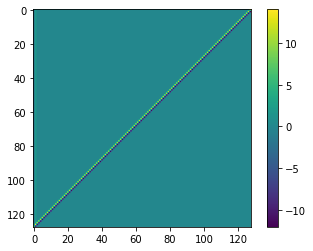

In [35]:
# Solution 
n = 128

#Layer 3
U3 = torch.triu(torch.ones(n, n)) - 0.2*torch.tril(torch.ones(n,n),diagonal=-1)

#Layer 2
W2 = 0.1*torch.ones(n,1,dtype=torch.float)
b2 = -0.1*torch.unsqueeze(torch.arange(0,n),0)

A2 = 0.1*(torch.triu(torch.ones(n, n))@torch.triu(torch.ones(n, n)).rot90())*(torch.triu(torch.ones(n, n))).rot90()
print("A2")
print(A2)

#Using equation 5
W3 = (torch.linalg.inv(A2)@U3).T
print("W3")
print(W3)
print("Determinant: ",np.linalg.det(W3))

plt.imshow(W3)
plt.colorbar()

In [36]:
class Encoder(nn.Module):
# This is a one layer encoder 
   
  def __init__(self, n_in, n_code):
    super(Encoder, self).__init__()
    
    self.W1 = Parameter(torch.ones(1,n, dtype= torch.float), requires_grad = True)
    
    self.b1 = Parameter(torch.tensor([[0]], dtype= torch.float), requires_grad = True)
    
  def forward(self, X):
    
    self.code = F.linear(X, self.W1, self.b1)
    
    return self.code

In [37]:
class Decoder(nn.Module):
# This is a two layers decoder 
   
  def __init__(self, n_code, n_h1, n_out):
    super(Decoder, self).__init__()
    
    self.W2 = Parameter(W2, requires_grad = True)
    
    self.b2 = Parameter(b2,  requires_grad = True)
    
    self.W3 = Parameter(W3, requires_grad = True)
    
  def forward(self, code):
    
    self.a2 = F.relu(F.linear(code, self.W2, self.b2))
    self.y = F.relu(F.linear(self.a2, self.W3))
    
    return self.y

In [38]:
encoder = Encoder(128,1)
decoder = Decoder(1, 128, 128)

ae = AutoEncoder(encoder, decoder)

In [39]:
X_test = torch.triu(torch.ones(n, n))
print(X_test)

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 1., 1., 1.],
        [0., 0., 1.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 0., 1., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


Text(0.5, 1.0, 'Predicted')

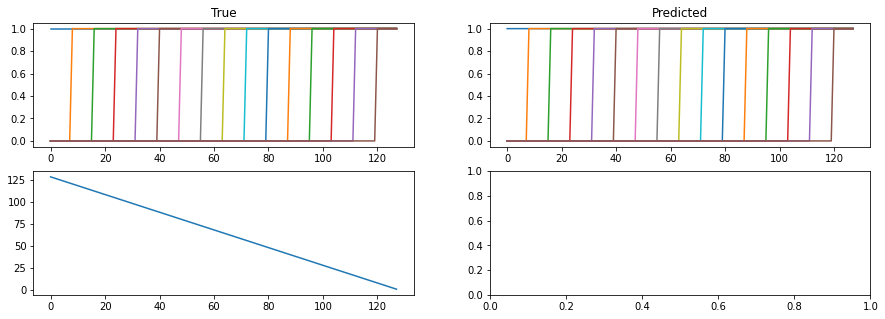

In [40]:
fig = plt.figure(figsize = (15,5))

axes = fig.subplots(2,2)

for n in np.arange(0, 128,8):
  axes[0,0].plot(X_test[n,:], label = n)
  axes[0,1].plot(ae.forward(X_test[[n],:]).detach().numpy().ravel(), label = n)

z_test = ae.encoder(X_test)
axes[1,0].plot(np.arange(X_test.shape[0]),z_test[:,0].detach().numpy())

axes[0,0].set_title("True")

axes[0,1].set_title("Predicted")


tensor([[1.0000, 1.0000, 1.0000,  ..., 1.0001, 1.0002, 1.0001],
        [0.0000, 1.0000, 1.0000,  ..., 1.0001, 1.0002, 1.0002],
        [0.0000, 0.0000, 1.0000,  ..., 1.0001, 1.0002, 1.0001],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 1.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000]],
       grad_fn=<ReluBackward0>)


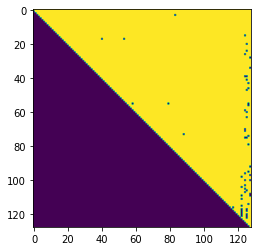

In [41]:
X_pred = ae.forward(X_test)
print(X_pred)
plt.imshow((X_pred!=X_test).detach().numpy())

In [42]:
print(((X_test-X_pred)**2).sum())

tensor(2.1592e-05, grad_fn=<SumBackward0>)
